## QUANTIUM_(Part 1)_Data preparation and customer analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import datetime
import re
from wordcloud import WordCloud
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

In [2]:
transaction = pd.read_excel('QVI_transaction_data.xlsx', sep='\t')
behavior = pd.read_csv('QVI_purchase_behaviour.csv')

In [3]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null datetime64[ns]
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [4]:
behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
LYLTY_CARD_NBR      72637 non-null int64
LIFESTAGE           72637 non-null object
PREMIUM_CUSTOMER    72637 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
behavior.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### DATA WRANGLING AND CLEANING:

Lets see duplicates in transaction column:

In [7]:
sum(transaction.duplicated(subset='LYLTY_CARD_NBR'))

192199

Lets check the various categories of colums of behavior dataset:

In [8]:
behavior.LIFESTAGE.value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [9]:
behavior.PREMIUM_CUSTOMER.value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [10]:
# import sys
# print(sys.version)
# "Hello"*-3
# df=pd.DataFrame({'a':[1,2,1],'b':[1,1,1]})
# df['a'] == 1

Now lets merge the datasets into one for further analysis:

In [11]:
zilinka = transaction.merge(behavior, how='outer', on = 'LYLTY_CARD_NBR')

In [12]:
# Checking entries for a card number:
zilinka[zilinka['LYLTY_CARD_NBR']==1011]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
102788,2018-07-29,1,1011,12,84,GrnWves Plus Btroot & Chilli Jam 180g,2,6.2,OLDER SINGLES/COUPLES,Mainstream
102789,2018-11-08,1,1011,13,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1,OLDER SINGLES/COUPLES,Mainstream
102790,2018-12-01,1,1011,14,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,OLDER SINGLES/COUPLES,Mainstream
102791,2018-12-19,1,1011,15,1,Smiths Crinkle Cut Chips Barbecue 170g,1,2.9,OLDER SINGLES/COUPLES,Mainstream


In [13]:
zilinka.sort_values(by = ['LYLTY_CARD_NBR'], inplace = True)

Let's create a new column for various packet sizes of these chips:

In [14]:
def split_nt(input):
    return int(re.findall('\d+', input)[0])
zilinka['PACK_SIZE(g)'] = zilinka['PROD_NAME'].apply(lambda x : split_nt(x))

In [15]:
def split_nt1(input):
    return re.findall('([a-zA-Z ]*)\d*.*', input)[0]
zilinka['PROD_NAME'] = zilinka['PROD_NAME'].apply(lambda x: split_nt1(x))

In [16]:
#Checking if we have any NA values in the dataset:
zilinka.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
PACK_SIZE(g)        0
dtype: int64

In [17]:
zilinka.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 256294
Data columns (total 11 columns):
DATE                264836 non-null datetime64[ns]
STORE_NBR           264836 non-null int64
LYLTY_CARD_NBR      264836 non-null int64
TXN_ID              264836 non-null int64
PROD_NBR            264836 non-null int64
PROD_NAME           264836 non-null object
PROD_QTY            264836 non-null int64
TOT_SALES           264836 non-null float64
LIFESTAGE           264836 non-null object
PREMIUM_CUSTOMER    264836 non-null object
PACK_SIZE(g)        264836 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 24.2+ MB


In [18]:
# Checking duplicates across various columns:
print(zilinka.duplicated(subset=['TXN_ID']).sum())
print(zilinka.duplicated(subset=['LYLTY_CARD_NBR']).sum())
print(zilinka.duplicated(subset=['STORE_NBR']).sum())

1709
192199
264564


In [19]:
# Reordering the columns in the dataset:
zilinka = zilinka[['DATE', 'LYLTY_CARD_NBR', 'TXN_ID', 'STORE_NBR', 'PROD_NBR', 'PROD_NAME', 'PACK_SIZE(g)', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER']]

In [20]:
# Checking for outliers in the dataset:
print("maximum sale:", zilinka.TOT_SALES.value_counts().index.max())
print("Median of Sales: ", zilinka.TOT_SALES.median())

maximum sale: 650.0
Median of Sales:  7.4


Since there is large gap, 650 is an outlier and hence we will drop it.

In [21]:
zilinka.drop(zilinka[zilinka.TOT_SALES > 600].index, inplace = True)

Lets set DATE column as the index and create a new column called 'BRAND' which has only brand of the chips:

In [22]:
zilinka.set_index(['DATE'], inplace=True)
zilinka.sort_index(inplace = True)
zilinka['BRAND'] = zilinka.PROD_NAME.str.split().str.get(0)

In [23]:
zilinka.head()

,LYLTY_CARD_NBR,TXN_ID,STORE_NBR,PROD_NBR,PROD_NAME,PACK_SIZE(g),PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND
DATE,,,,,,,,,,,
2018-07-01,5109,4994,5,60,Kettle Tortilla ChpsFeta,150,2,9.2,YOUNG FAMILIES,Premium,Kettle
2018-07-01,109063,110536,109,98,NCC Sour Cream,175,2,6.0,YOUNG SINGLES/COUPLES,Mainstream,NCC
2018-07-01,69252,67424,69,59,Old El Paso Salsa Dip Tomato Med,300,2,10.2,YOUNG FAMILIES,Premium,Old
2018-07-01,232010,235241,232,112,Tyrrells Crisps Ched,165,2,8.4,YOUNG FAMILIES,Budget,Tyrrells
2018-07-01,201033,200077,201,4,Dorito Corn Chp Supreme,380,2,13.0,OLDER SINGLES/COUPLES,Premium,Dorito


### DATA VISUALIZATION AND ANALYSIS:

In [24]:
zilinka_cus_brand = pd.DataFrame(zilinka.groupby(['PREMIUM_CUSTOMER','BRAND'])['BRAND'].count()).rename(columns = {'BRAND':'Count'}).reset_index()
fig = px.scatter(zilinka_cus_brand, x='BRAND', y='Count', color = 'PREMIUM_CUSTOMER')
fig.show()

From the above plot, we get to see that across the different brand of chips, Mainstream Customers are mostly the one with maximum sales followed by Budget. Surprisingly Premium are the lowest.
Among the brands Kettle has the highest sales.

In [25]:
zilinka_cust = zilinka.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
zilinka_cust = pd.DataFrame(zilinka_cust).reset_index()
# zilinka_cust = zilinka_cust.rename(columns = {'PREMIUM_CUSTOMER':'COUNT'}).reset_index()

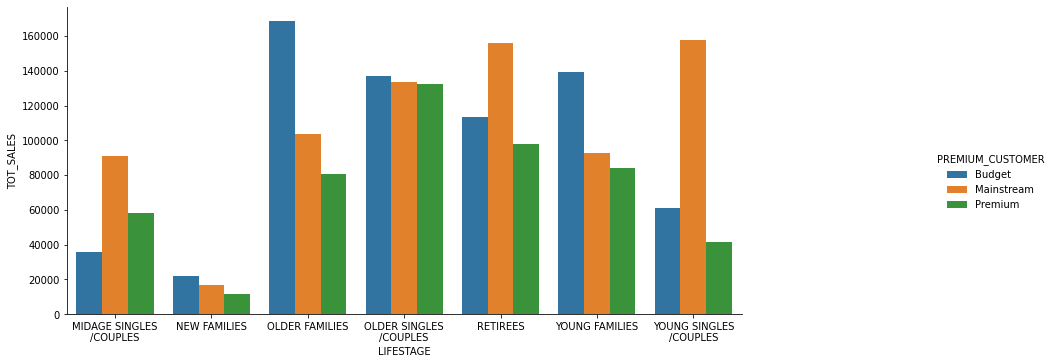

In [26]:
ax = sns.catplot(x = 'LIFESTAGE', y = 'TOT_SALES', hue = 'PREMIUM_CUSTOMER', data = zilinka_cust, kind = 'bar');
ax.fig.set_size_inches(17,5)
plt.xticks([0,1,2,3,4,5,6], ['MIDAGE SINGLES\n/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES', 
                             'OLDER SINGLES\n/COUPLES', 'RETIREES', 'YOUNG FAMILIES', 'YOUNG SINGLES\n/COUPLES']);

From the above plot we see that New Families are lowest buyers across the Customer types and Older Singles are highest for Mainstream and Premium Cutomers. We also See that Budget Customers under Older Families are highest.

In [27]:
tot_sales = zilinka.groupby(['PROD_NBR', 'PROD_NAME', 'PREMIUM_CUSTOMER'])['PROD_QTY', 'TOT_SALES'].sum()
tot_sales.reset_index(inplace=True)

In [28]:
fig = px.scatter(tot_sales, x='PROD_QTY', y='TOT_SALES', color = 'PREMIUM_CUSTOMER', hover_data=['PROD_NAME'])
fig.show()

Here we see that there is a linear relationship between Product Quantity and Total Sales which is expected. We see different clusters at various product quantity with Budget and Mainstream overlapping at 1000. Mainstream is leading at 2500.

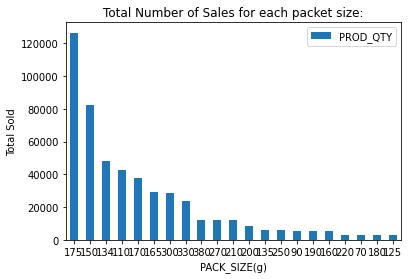

In [29]:
df = pd.DataFrame(zilinka.groupby(['PACK_SIZE(g)'])['PROD_QTY'].sum()).sort_values('PROD_QTY', ascending = False).plot(kind = 'bar');
plt.rcParams["figure.figsize"] = [10, 5]
plt.ylabel('Total Sold')
plt.xticks(rotation = 0)
plt.title("Total Number of Sales for each packet size:")
plt.show()

The most sold packet size is 175g followed by 150, we also see that higher packet sizes are sold lesser. Lets see compare smaller, average and larger packet sizes in terms of total amount of Sales.

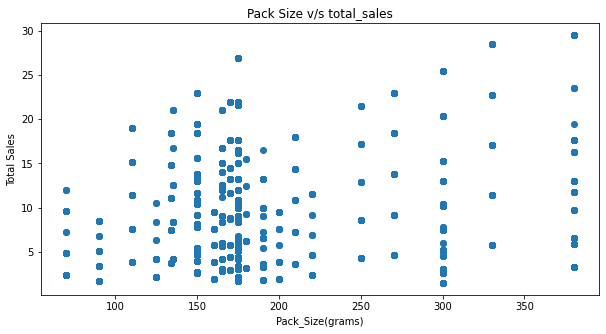

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(x= zilinka['PACK_SIZE(g)'],y=zilinka['TOT_SALES'])
plt.title('Pack Size v/s total_sales')
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Pack_Size(grams)', size=10)
plt.ylabel('Total Sales', size=10);

We see that points are more crowded around 150 to 200 which shows that these packet sizes have the higher number of sales. 

In [31]:
large_size = round(zilinka['TOT_SALES'][zilinka['PACK_SIZE(g)'] >= 210].sum(), 2)
medium_size = round(zilinka['TOT_SALES'][(zilinka['PACK_SIZE(g)'] > 150) & (zilinka['PACK_SIZE(g)'] < 210)].sum(), 2)
small_size = round(zilinka['TOT_SALES'][zilinka['PACK_SIZE(g)'] <= 150].sum(), 2)

df = pd.DataFrame({'Total_sales': [large_size, medium_size, small_size]},
                  index=['large_size', 'medium_size', 'small_size'])

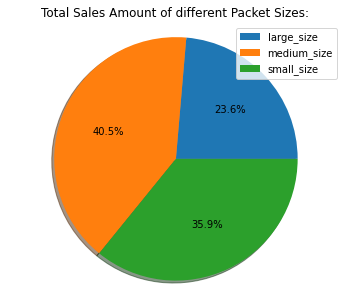

In [32]:
fig1, ax = plt.subplots(figsize=(6,5));
ax.pie(df['Total_sales'], autopct = '%1.1f%%', shadow=True)
ax.legend(df.index, loc="best")
ax.axis('equal')
ax.set_title("Total Sales Amount of different Packet Sizes:");

From the pie chart we see that large size(>210 g) has least sales and small and medium have almost same sales.

In [33]:
rolmean = pd.DataFrame(zilinka.TOT_SALES).rolling(window = 12).mean()
rolstd =  pd.DataFrame(zilinka.TOT_SALES).rolling(window = 12).std()
# print(rolmean, rolstd)

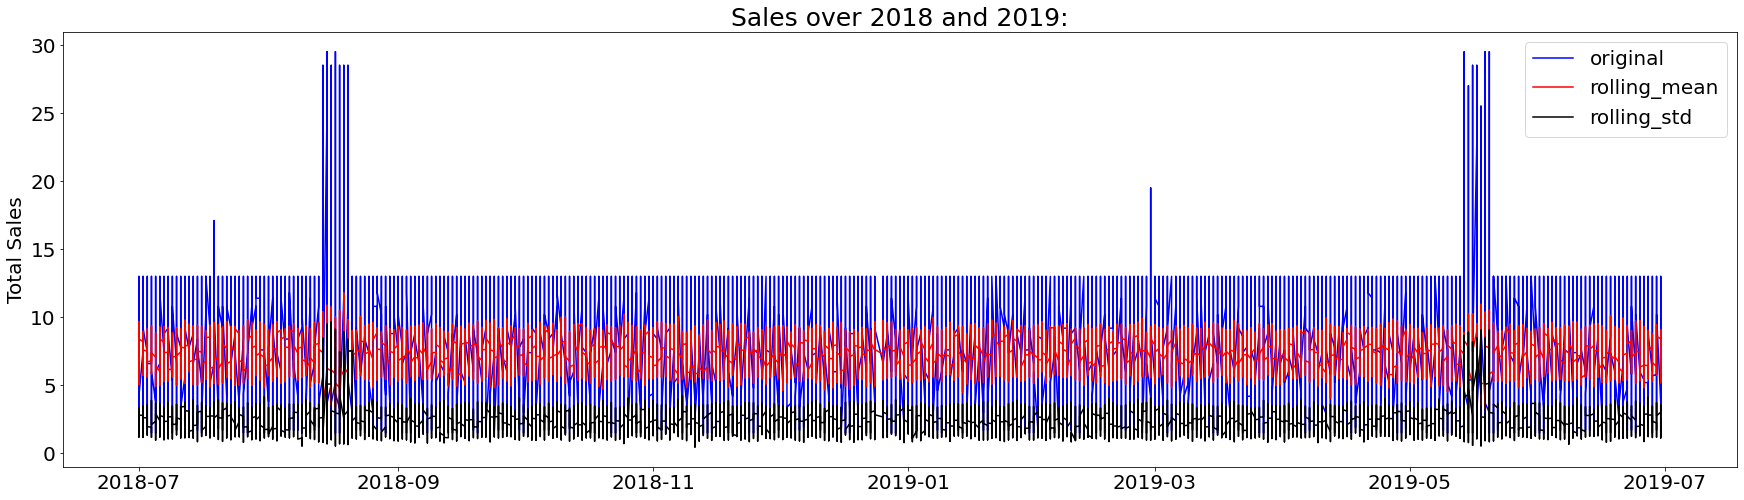

In [34]:
plt.figure(figsize = (30, 8))
plt.plot(zilinka.TOT_SALES, color = 'blue', label = 'original')
plt.plot(rolmean, color = 'red', label = 'rolling_mean')
plt.plot(rolstd, color = 'black', label = 'rolling_std')
plt.ylabel('Total Sales', size = 20)
plt.legend(loc = 'best', prop={'size': 20})
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.title("Sales over 2018 and 2019:", size = 25, loc = 'center');

Since all three, the original data, the rolling mean and the rolling standard deviation are constant, we can say that our data is stationary. The Sales have been constant over the years and will continue to do so.

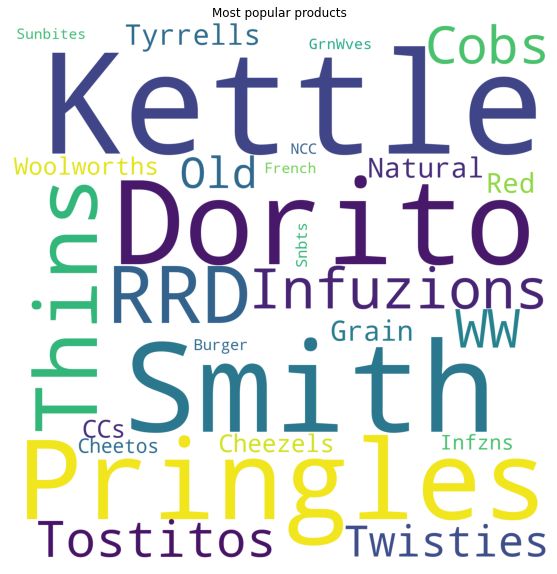

In [35]:
c = ' '.join([text for text in zilinka['BRAND'] if text != 'Chip'])
plt.figure(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white', collocations = False, width=1500, height=1500).generate(c)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most popular products');

We can see that Kettle, Doritos, Pringles, and Smiths are among the most popular brands.

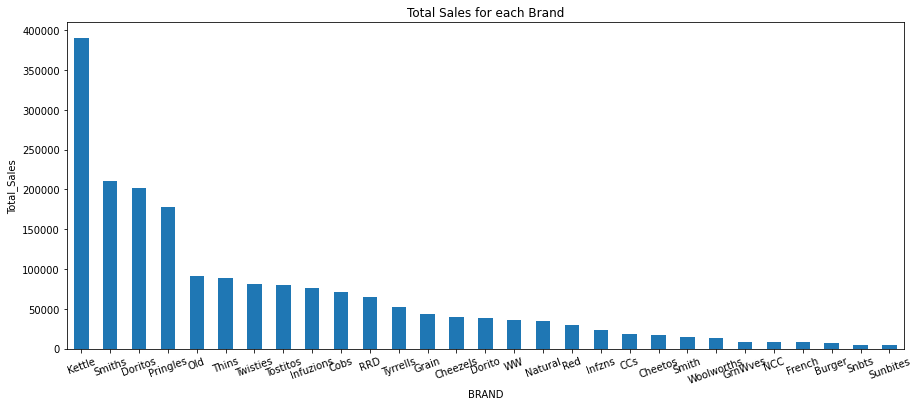

In [36]:
plt.figure(figsize=(15,6))
zilinka.groupby(['BRAND'])['TOT_SALES'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Total_Sales')
plt.xticks(rotation=20)
plt.title('Total Sales for each Brand');

In terms of Sales amount as well, Kettle, Smiths, Doritos and Pringles are leading the market.

### Conclusion:

<ol>
    <li>Across the different brand of chips, Mainstream Customers are mostly the one with maximum sales followed by Budget. Surprisingly Premium are the lowest.</li>
    <li>New Families are lowest buyers across the Customer types and Older Singles are highest for Mainstream and Premium Cutomers. We also See that Budget Customers under Older Families are highest.</li>
    <li>The most sold packet size is 175g followed by 150, we also see that higher packet sizes are sold lesser. Lets see compare smaller, average and larger packet sizes in terms of total amount of Sales.</li>
    <li>We see that large size(>210 g) has least sales and small and medium have almost same sales.</li>
    <li>The Sales have been constant over the years and will continue to do so.</li>
    <li> Kettle, Doritos, Pringles, and Smiths are among the most popular brands and highest Sales.</li>
    </ol>

### THE END!!